# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [50]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

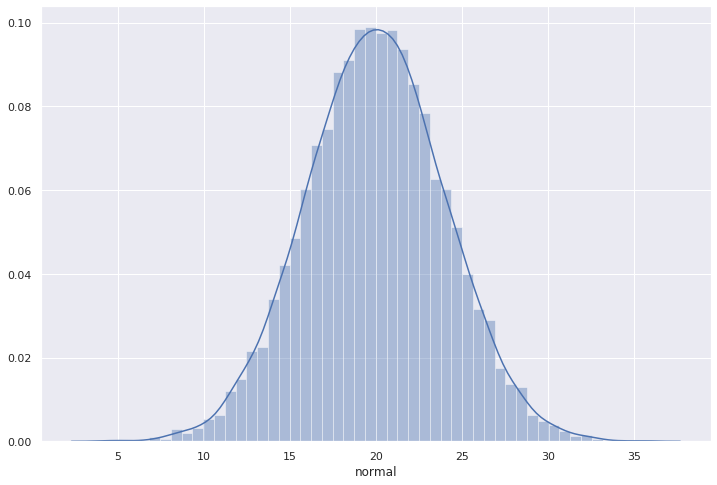

In [71]:
# Plotagem da variável normal

sns.distplot(dataframe['normal']);


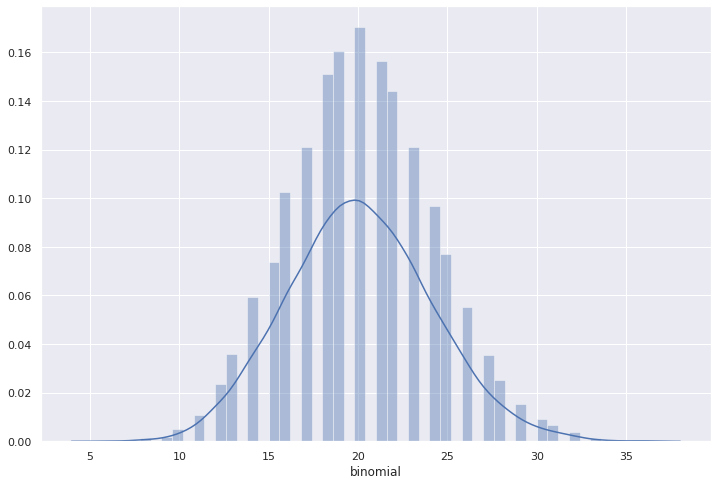

In [72]:
# Plotagem da variável binomial
sns.distplot(dataframe['binomial']);

In [32]:
# Assimetria e Curtose da distribuição

print('Assimetria : \n{}' .format(dataframe.skew()))

print('\n\nCurtose : \n{}' .format(dataframe.kurtosis()))


Assimetria : 
normal      0.001964
binomial    0.153354
dtype: float64


Curtose : 
normal      0.027093
binomial    0.002033
dtype: float64


In [217]:
# Checagem das primeiras linhas do dataframe
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [22]:
# Estatísticas descritivas

dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [18]:
def q1():
    #Describe
    df_desc = dataframe.describe()
    
    #Filtro dos quartis
    resul = df_desc.iloc[4:7]
    
    #Diferença
    resul = tuple(round((resul['normal'] - resul['binomial']),3))
    return resul
    pass
q1()  

(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

Sim.

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

Explica-se pelo fato de que, embora as variáveis tenham distribuições diferentes, o tamanho das respectivas amostras é tal que se forma uma distribuição de amostragem muito próxima da média da população,
de acordo com Teorema do Limite Central.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [19]:
def q2():
    # Função distribuição acumulada empírica
    ecdf_normal = ECDF(dataframe['normal'])
    
    #Média
    normal_mean = dataframe['normal'].mean()
    
    #Desvio Padrão
    normal_std = dataframe['normal'].std()
    
    #Probabilidade da diferença [𝑥¯−𝑠,𝑥¯+𝑠] 
    proba = float(round(ecdf_normal(normal_mean + normal_std) - ecdf_normal(normal_mean - normal_std),3))
    return proba
    pass
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?

Sim, uma vez que a função da densidade da distribuição é normal,e também, considerando o teorema central da probabilidade, 68%
dos dados estarão próximos da média da distribuição, ou +- 1 desvio padrão.

* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [20]:
def q3():
    
    #Diferença das médias
    dif_media= round(((dataframe['binomial'].mean()) - (dataframe['normal'].mean())),3)
    
    #Diferença das variâncias
    dif_var = round(((dataframe['binomial'].var()) - (dataframe['normal'].var())),3)
    
    #Diferença final
    dif_final = (dif_media, dif_var) 
    return dif_final
    pass
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valores dessa magnitude?

Sim, a baixa diferença das médias bem como das variâncias são próximas de zero devido ao tamanho da distribuição.

* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [74]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [234]:
# Sua análise da parte 2 começa aqui.

stars.head()


,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


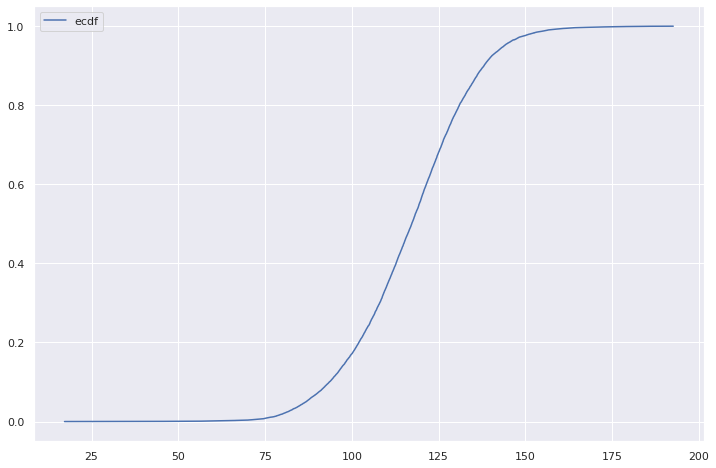

In [112]:
# Plotagem do Empirical Cumulative Distribution Function para a variável padronizada mean_profile


 # Filtro para as estrelas 'não pulsares' identificados como False
mean_profile = stars.loc[stars['target'] == False]['mean_profile']
 
# Padronização dos dados
#false_pulsar_mean_profile_standardized = (mean_profile - mean_profile.mean()) / (mean_profile.std())
false_pulsar_mean_profile_standardized = mean_profile


# Distribuição empírica do variável mean_profile
ecdf = ECDF(false_pulsar_mean_profile_standardized)
plt.plot(ecdf.x, ecdf.y, label = 'ecdf')
plt.legend()
plt.show()


## Inferência: Pode-se observar que a ECDF da variável 'mean_profile ' (padronizada) está próxima de uma distribuição normal.

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [75]:
def q4():
    # Filtro para as estrelas 'não pulsares' identificados como False
    mean_profile = stars.loc[stars['target'] == False]['mean_profile']
 
    # Padronização dos dados
    false_pulsar_mean_profile_standardized = (mean_profile - mean_profile.mean()) / (mean_profile.std())

    # Distribuição empírica do variável mean_profile
    ecdf = ECDF(false_pulsar_mean_profile_standardized)

    #Probabilidades calculadas para os quantis de uma distribuição normal
    quantis_prob = np.round(ecdf(sct.norm.ppf([0.8, 0.9, 0.95])),3)
    
    return tuple(quantis_prob)
    pass
q4()

(0.806, 0.911, 0.959)

In [114]:
sct.norm.ppf([0.8, 0.9, 0.95])

array([0.84162123, 1.28155157, 1.64485363])

Para refletir:

* Os valores encontrados fazem sentido?

Sim, a probabilidade é coerente,pois o ECDF segue uma distribuição normal.

* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Trata-se de uma variável com média = 0 e desvio padrão = 1

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [21]:
def q5():
    # Separando os quantis
    quantiles = [0.25, 0.5, 0.75]
    
    # Filtro para as estrelas 'não pulsares' identificados como False
    mean_profile = stars.loc[stars['target'] == False]['mean_profile']
    
    # Padronização dos dados
    false_pulsar_mean_profile_standardized = (mean_profile - mean_profile.mean()) / (mean_profile.std())
    
    # Diferença de quantis
    dif = tuple(round(false_pulsar_mean_profile_standardized.quantile(quantiles) - sct.norm.ppf(quantiles),3))
    
    return dif
    pass
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?

Sim, pois qualquer ponto da distribuição assume o valor 0.

* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Significa que trata-se de uma distribuição padronizada que, por sua vez, segue uma distribuição normal.

* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.